# Logistic Regression

I would like to explain how to implement logistic regression from scratch using Python. We will first start by a binary classification (2 possible outputs), and then implement a multiclass classification.

## Binary classification

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
numpydata = np.loadtxt(fname="logistic_binary.txt",delimiter=",")
X = numpydata[:,0:-1]
y = numpydata[:,-1]

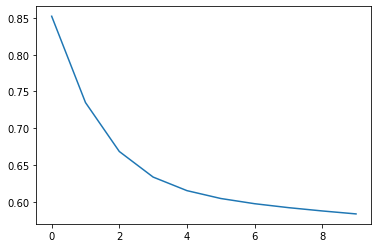

In [99]:
def train (X,y,alpha=3.285e-4,iterations=10,plot=False):
    #find the dimension D and number of samples m
    D = X.shape[1]
    m = X.shape[0]
    #initialization of the parameters

    theta0=0
    theta=1e-1*np.random.randn(D) #vector of dimension D
    
    #Gradient descent algorithm
    J_tab = []
    for i in range(iterations):
        h = (1/(1+np.exp((-(np.dot(X,theta) + theta0))))) #vector of dimension m number of samples
        J = (1/m)*np.sum(np.dot(-y.T,np.log10(h))-np.dot((1-y).T,np.log(1-h))) #real
        #gradient calculation
        dJ_dtheta = np.dot(X.T,h-y)/m #vector of dimension n
        dJ_dtheta0 = (1/m)*np.sum(h - y)
        #parameters actualization 
        theta = theta - alpha * dJ_dtheta
        theta0 = theta0 - alpha*dJ_dtheta0
        #saving values of the cost to plot the graph
        J_tab.append(J)
        #print(J_tab)
    
    if(plot==True):
            plt.plot(range(iterations), J_tab)
            
train(X,y,plot=True)

## Multiple classes

The idea is to train one hypothesis h per class. So in total we will have k hypthoseses (with k=number of classes). To predict a value from an input x, the the different h values will be calculated, and the highest value will correspond to the highest probability that the output is of the corresponding class. 

Indeed hi = P(y=i|x;theta) for each class

In [97]:
def train_g (X,y,alpha=3.285e-4,iterations=10,plot=False):
    #find the dimension D and number of samples m
    D = X.shape[1]
    m = X.shape[0]
    k = np.unique(y) #gives array containing the classes unique values sorted
    
    #initialization of the parameters

    theta0=0
    Theta0=[] # one theta0 value per class => one vector of dimension k
    theta=1e-1*np.random.randn(D) #vector of dimension D
    Theta=[] #matrix of dimension k x D
    #Gradient descent algorithm
    J_TAB = []
    J_tab = []
    
    for j in range(k.shape[0]):
        for i in range(iterations):
            h = (1/(1+np.exp((-(np.dot(X,theta) + theta0))))) #vector of dimension m number of samples
            J = (1/m)*np.sum(np.dot(-y.T,np.log10(h))-np.dot((1-y).T,np.log(1-h))) #real
            #gradient calculation
            dJ_dtheta = np.dot(X.T,h-y)/m #vector of dimension D
            dJ_dtheta0 = (1/m)*np.sum(h - y)
            #parameters actualization 
            theta = theta - alpha * dJ_dtheta #vector of dimension D
            theta0 = theta0 - alpha*dJ_dtheta0 #real value
            #saving values of the cost to plot the graph
            J_tab.append(J)
        Theta0.append(theta0) #vector of dimension k
        Theta.append(theta) #matrix of dimension k x D
        J_TAB.append(J_tab)
        #print(J_tab)
        #if(plot==True):
            #plt.plot(range(iterations), J_tab)
    return np.array(Theta0), np.array(Theta)
            
train_g(X,y,plot=True)

(array([ 1.42639449e-04, -8.84916238e-05]),
 array([[0.00149762, 0.0093143 ],
        [0.00358779, 0.00721455]]))

# Simple neural networks

In [75]:
import numpy as np
import matplotlib.pyplot as plt


In [128]:
X = np.loadtxt('X_handwritten.txt')
y = np.loadtxt('y_handwritten.txt')
theta1 = np.loadtxt('Theta1.txt')
theta2 = np.loadtxt('Theta2.txt')

bias1 = theta1[:,0]
bias2=theta2[:,0]
theta1 = np.delete(theta1, 0, 1) # delete second column of C
theta2 = np.delete(theta2, 0, 1)

(25,)

In [ ]:
In the received data the bias and the parameters are in the same

In [87]:
from PIL import Image
sample=X[200,:].reshape(20,20)
img = Image.fromarray(sample)

ValueError: cannot reshape array of size 400 into shape (25,25)

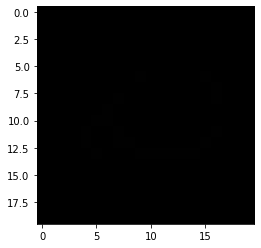

In [86]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

Let's implement a simple fully connected neural network with a (20x20) pixels picture containing a handwritten digit as input layer, one hidden layer (25 units) an ouput layer (10 classes: digits 0 to 9). The digit zero is written as ten in the data set. Therefore, a “0” digit is labeled as “10”, while the digits “1” to “9” are labeled as “1” to “9” in their natural order.

Let's convert y from an integer to a vector for each sample. What we want to achieve is for example: y = 2 becomes y=[0,0,1,0,0,0,0,0,0,0]

In [106]:
import pandas as pd

y_copy=pd.DataFrame(y)
y_copy=pd.get_dummies(y[0].astype(int))

#convert dataframe to numpy array
y_copy = y_copy.to_numpy()

NOT USING REGULARIZATION TERM FOR NOW
NOT INCLUDING BIAS1 & BIAS2

In [154]:
def train_neural (X,y,iterations=2):
    #definition of the layers
    D = X.shape[1] #dimension of the input
    H1 = 25 #hidden layer contains 25 units
    k = np.unique(y).shape[0] # number of classes
    #initialization of theta and bias
    bias_1 = np.matlib.zeros((25,10)) #matrix (25 x 10)
    bias_2 = np.matlib.zeros((25,10))
    theta_layer1 = theta1
    theta_layer2 = theta2
    
    for i in range(iterations):
    #Forward propagation
        z_2 = np.dot(X,theta_layer1.T) #+ bias_1
        a_2 = (1/(1+np.exp((-z_2))))
        z_3 = np.dot(a_2,theta_layer2.T) #+ bias_2
        a_3 = (1/(1+np.exp((-z_3))))
        #Backward propagation
        # dL/dtheta = dL/dz . dz/dtheta
        #dL/dtheta2
        delta_3 = a_3-y # delta = dL/dz
        dz_dtheta2 = a_2
        dL_dtheta2 = np.dot(a_2.T,delta_3)
        #dL/dtheta1
        a=np.dot(delta_3,theta_layer2)
        b=(a_2*(1-a_2))
        delta_2 = b*a 
        dz_dtheta1 = X
        dL_dtheta1 = np.dot (dz_dtheta1.T, delta_2)
        
        #Parameters update
        theta_layer1 = theta_layer1 - dL_dtheta1.T
        theta_layer2 = theta_layer2 - dL_dtheta2.T
        
    return theta_layer1, theta_layer2
    
model = train_neural (X,y_copy,iterations=2)
    

C:\Users\nbenhassen\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


In [ ]:
def predict_neural (X):
    theta1 = 
    for i in range